# Partial dependence plots - sklearn

[Machine Learning Interpretability course](https://www.trainindata.com/p/machine-learning-interpretability)


In this notebook we will use Scikit-learn to plot partial dependence plots.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

from sklearn.inspection import PartialDependenceDisplay

### Load data

In [2]:
# load the California House price data from Scikit-learn
X, y = fetch_california_housing(return_X_y=True, as_frame=True)
X = X.drop(columns=["Latitude", "Longitude"])

# binarize these variables
X["AveRooms"] = np.where(X["AveRooms"]<7, 0, 1)
X["AveBedrms"] = np.where(X["AveBedrms"]<7, 0, 1)

# display top 5 rows
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,8.3252,41.0,0,0,322.0,2.555556
1,8.3014,21.0,0,0,2401.0,2.109842
2,7.2574,52.0,1,0,496.0,2.802260
3,5.6431,52.0,0,0,558.0,2.547945
4,3.8462,52.0,0,0,565.0,2.181467


In [3]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((14448, 6), (6192, 6))

## Random Forest

In [4]:
# fit model

rf = RandomForestRegressor(
    criterion="squared_error",
    n_estimators=25,
    max_depth=3,
    random_state=3,
)

rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=3, n_estimators=25, random_state=3)

In [5]:
# R2 in train set

rf.score(X_train, y_train)

0.5614159973182994

In [6]:
# R2 in test set

rf.score(X_test, y_test)

0.5366417651487927

The model explains > 50% of the variability in the target variable.

## Tree derived feature importance

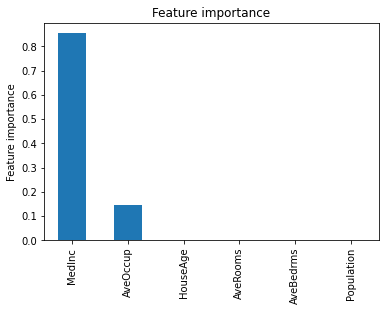

In [7]:
# random forest importance

global_exp = pd.Series(rf.feature_importances_, index=rf.feature_names_in_)

global_exp.sort_values(ascending=False).plot.bar()
plt.ylabel("Feature importance")
plt.title("Feature importance")
plt.show()

## Partial dependence plots

In [8]:
# The features used in the model

rf.feature_names_in_

array(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population',
       'AveOccup'], dtype=object)

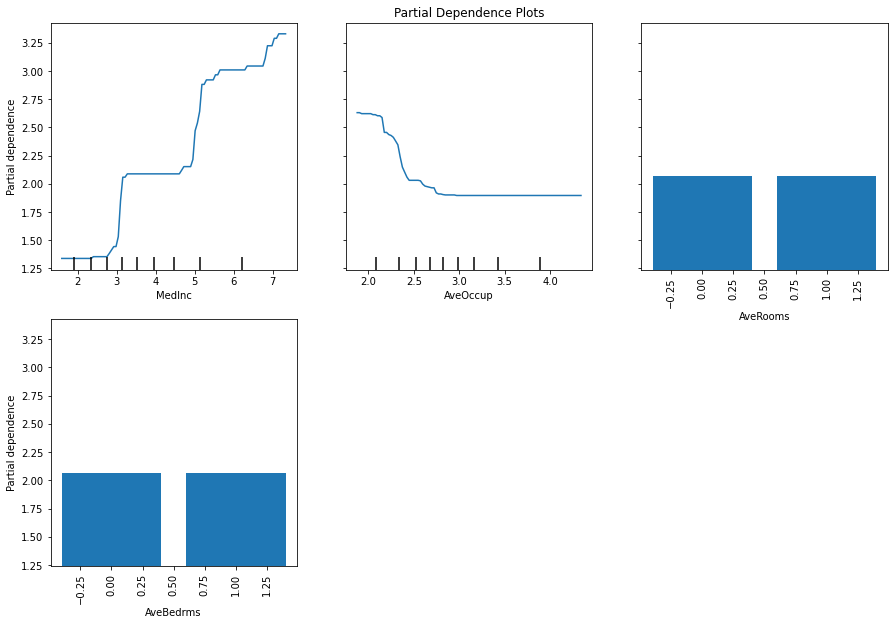

In [9]:
# PDP for a mix of numerical and categorical features

fig, ax = plt.subplots(figsize=(15, 10))
ax.set_title("Partial Dependence Plots")

PartialDependenceDisplay.from_estimator(
    estimator=rf,
    X=X_test,
    features=(0, 5, 2, 3), # the features to plot
    categorical_features = (2, 3), # categorical features
    random_state=5,
    ax=ax,
)

plt.show()

The house price increases with MedInc. We see the staggered increase typical of decision tree based models.

The house price decreases with the average house occupancy up to a certain level and then it does not decrease any further.

The average number of rooms does not affect the house price.

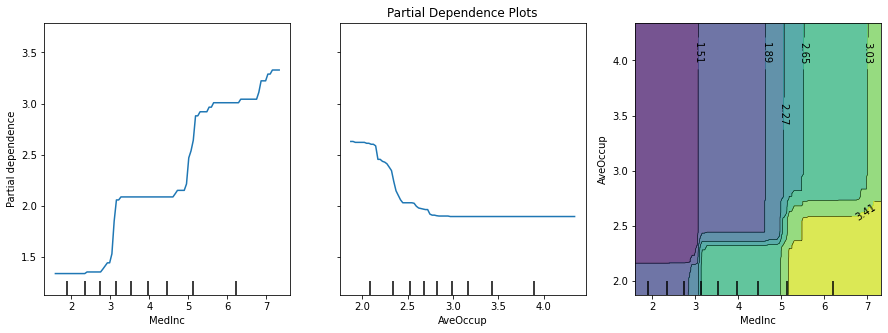

In [10]:
# PDP for the 3 first features

fig, ax = plt.subplots(figsize=(15, 5))
ax.set_title("Partial Dependence Plots")

PartialDependenceDisplay.from_estimator(
    estimator=rf,
    X=X_test,
    features=(0, 5, (0,5)), # the features to plot
    categorical_features = None, # categorical features
    random_state=5,
    ax=ax,
)

plt.show()

There is no surprise in the 2-way PDP. The 2-way plot tells almost the same that we learn from looking at the individual plots.